In [1]:
import os
import logging
import pandas as pd

from stellr import Stars

In [2]:
scale = 'DR14_ASPC'
inputs = pd.read_csv(f'../../data/stellr/inputs_{scale}.csv')
inputs.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.60000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
1,KIC7799349,4976.7870,82.60566,4.421854,0.138701,33.299,0.322,0.284619,0.029484,3.670984,0.007718,0,0,0
2,KIC5822889,5184.0103,94.43386,12.830989,0.707319,19.708,0.127,-0.026246,0.039186,3.401706,0.012167,0,0,0
3,KIC12069569,6062.4185,168.10576,7.144911,0.291244,44.687,2.162,-0.084244,0.066659,3.825712,0.060999,0,0,0
4,KIC6947945,5334.4380,103.46670,3.806103,0.153818,43.660,1.416,-0.041512,0.043107,3.794063,0.011004,0,0,0


In [3]:
star_results = pd.read_csv(f'star_results/{scale}/results.csv')
star_results.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
0,KIC8696343,0.329544,0.535028,0.750714,3465.026645,3470.784552,3470.784552,4452.795022,0.178496,0.894584,...,-0.091808,0.163315,0.000802,0.000631,0.039864,1.000220,0.068781,0,0.038152,0
1,KIC11137075,1.645226,1.720488,1.784974,3419.524685,3409.395788,3406.321111,4298.200541,1.608032,1.816053,...,-0.205533,-0.025844,0.000514,0.000399,-0.115516,1.000865,0.047839,0,0.040208,0
2,KIC8394589,0.296880,0.490792,0.648651,2711.258019,2684.985793,2684.985793,3108.726395,0.185376,0.740457,...,-0.429907,-0.146638,0.000846,0.000599,-0.286765,1.001393,0.076776,0,0.041525,0
3,KIC8106950,1.437524,1.621428,1.743955,939.027429,476.027185,476.027185,334.784723,1.221600,1.858592,...,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654,5,0.062659,0
4,KIC11021413,1.840180,1.876796,1.906506,3078.224992,3100.655394,3096.632667,5051.944766,1.811953,1.926169,...,-0.060868,0.097428,0.000562,0.000432,0.021168,1.000584,0.041893,0,0.048637,0


In [4]:
data = inputs.merge(star_results, on='name')
data.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,-0.284495,-0.013172,0.000981,0.000694,-0.151448,1.001407,0.071900,0,0.054942,0
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,-0.393727,-0.173140,0.000782,0.000563,-0.286475,1.000882,0.058960,0,0.048128,0
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,-0.341552,-0.162151,0.000541,0.000394,-0.255384,1.000796,0.047517,0,0.035056,0
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,-0.255677,0.007847,0.000788,0.000557,-0.127043,1.000164,0.071724,0,0.040745,0
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,-0.419973,-0.155620,0.000775,0.000573,-0.283777,1.000701,0.070283,1,0.047939,0


In [5]:
data = data[data['off_grid']==0]
print('Length = ', len(data))
data.head()

Length =  73


,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,-0.284495,-0.013172,0.000981,0.000694,-0.151448,1.001407,0.071900,0,0.054942,0
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,-0.393727,-0.173140,0.000782,0.000563,-0.286475,1.000882,0.058960,0,0.048128,0
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,-0.341552,-0.162151,0.000541,0.000394,-0.255384,1.000796,0.047517,0,0.035056,0
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,-0.255677,0.007847,0.000788,0.000557,-0.127043,1.000164,0.071724,0,0.040745,0
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,-0.419973,-0.155620,0.000775,0.000573,-0.283777,1.000701,0.070283,1,0.047939,0


In [6]:
data[data['divergences']>0].sort_values('divergences', ascending=False)

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
22,KIC6933899,5771.8300,123.266030,2.878510,0.101305,72.139,0.066,0.029745,0.071016,4.088904,...,-0.082269,0.166702,0.001755,0.001241,0.043656,1.008746,0.065786,102,0.035237,0
41,KIC3656476,5583.0280,109.906480,1.527948,0.047990,93.305,0.079,0.286964,0.067221,4.226422,...,0.171267,0.395982,0.001217,0.000880,0.284439,1.003845,0.059428,101,0.055250,0
11,KIC7296438,5659.3520,112.885410,1.851060,0.055703,88.743,0.110,0.264414,0.068744,4.209394,...,0.139322,0.379770,0.002438,0.001818,0.262211,1.012859,0.064683,63,0.048233,0
45,KIC7680114,5772.8145,120.695120,2.076880,0.061357,85.169,0.083,0.118596,0.071058,4.180579,...,-0.010636,0.248215,0.001900,0.001455,0.124847,1.004206,0.068564,46,0.049469,0
36,KIC4450844,5757.8535,128.540330,2.541903,0.091654,72.653,0.198,-0.162463,0.070650,4.080208,...,-0.273367,-0.012545,0.001156,0.000817,-0.144475,1.006886,0.068714,16,0.046953,0
27,KIC11244118,5506.8250,107.376114,2.180462,0.065153,71.373,0.069,0.295459,0.065733,4.079349,...,0.186307,0.405908,0.002237,0.001582,0.301542,1.013130,0.057865,8,0.042025,0
65,KIC12265063,5823.8570,131.539200,2.838648,0.099818,67.875,2.498,-0.182138,0.072024,4.071656,...,-0.289334,-0.032451,0.000882,0.000636,-0.161061,1.001180,0.068810,7,0.061381,0
75,KIC8106950,5791.0340,156.561170,3.030285,0.137285,62.061,6.098,-0.367033,0.065125,4.007842,...,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654,5,0.062659,0
62,KIC8012842,5730.6060,116.651470,1.716418,0.054428,95.845,3.970,0.210965,0.070195,4.247097,...,0.088100,0.324546,0.000915,0.000682,0.210262,1.003238,0.062397,3,0.051289,0
30,KIC4465324,5677.1255,128.366060,1.844556,0.066635,86.274,1.457,0.091695,0.078087,4.183508,...,-0.023318,0.251952,0.000964,0.000724,0.106478,1.000884,0.072506,3,0.057361,0


Choose divergences less than 4.

In [7]:
data = data[data['divergences']<4]
print('Length = ', len(data))
data.head()

Length =  65


,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,-0.284495,-0.013172,0.000981,0.000694,-0.151448,1.001407,0.071900,0,0.054942,0
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,-0.393727,-0.173140,0.000782,0.000563,-0.286475,1.000882,0.058960,0,0.048128,0
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,-0.341552,-0.162151,0.000541,0.000394,-0.255384,1.000796,0.047517,0,0.035056,0
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,-0.255677,0.007847,0.000788,0.000557,-0.127043,1.000164,0.071724,0,0.040745,0
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,-0.419973,-0.155620,0.000775,0.000573,-0.283777,1.000701,0.070283,1,0.047939,0


In [8]:
observed = {
    'stars': data
}

In [9]:
stars = Stars(name=scale, path='stars_results', observed=observed)

logging.basicConfig(
    format='%(asctime)s: %(levelname)s: %(message)s', 
    filename=os.path.join(stars.savedir, 'stars.log'), 
    level=logging.INFO,
)

In [10]:
sample_kwargs = {
    'num_samples': 2000,
    'burn_in': 2000,
    'num_chains': 10,
    'xla': True,
    'adaptation_kwargs': {
        'target_accept_prob': 0.98,
    },
}

In [11]:
%%time
stars.fit(sample_kwargs=sample_kwargs)

2020-08-24 16:39:31,514 stellr.optimizer INFO     Fitting stars for 2000 samples across 10 chains with 2000 burn in steps per chain.
2020-08-24 17:14:03,608 stellr.optimizer WARNING  The number of effective samples was less than 10% for 976 parameters.
2020-08-24 17:14:03,614 stellr.optimizer WARNING  The number of effective samples was less than 25% for 1174 parameters.


CPU times: user 33min 48s, sys: 58.7 s, total: 34min 47s
Wall time: 34min 45s


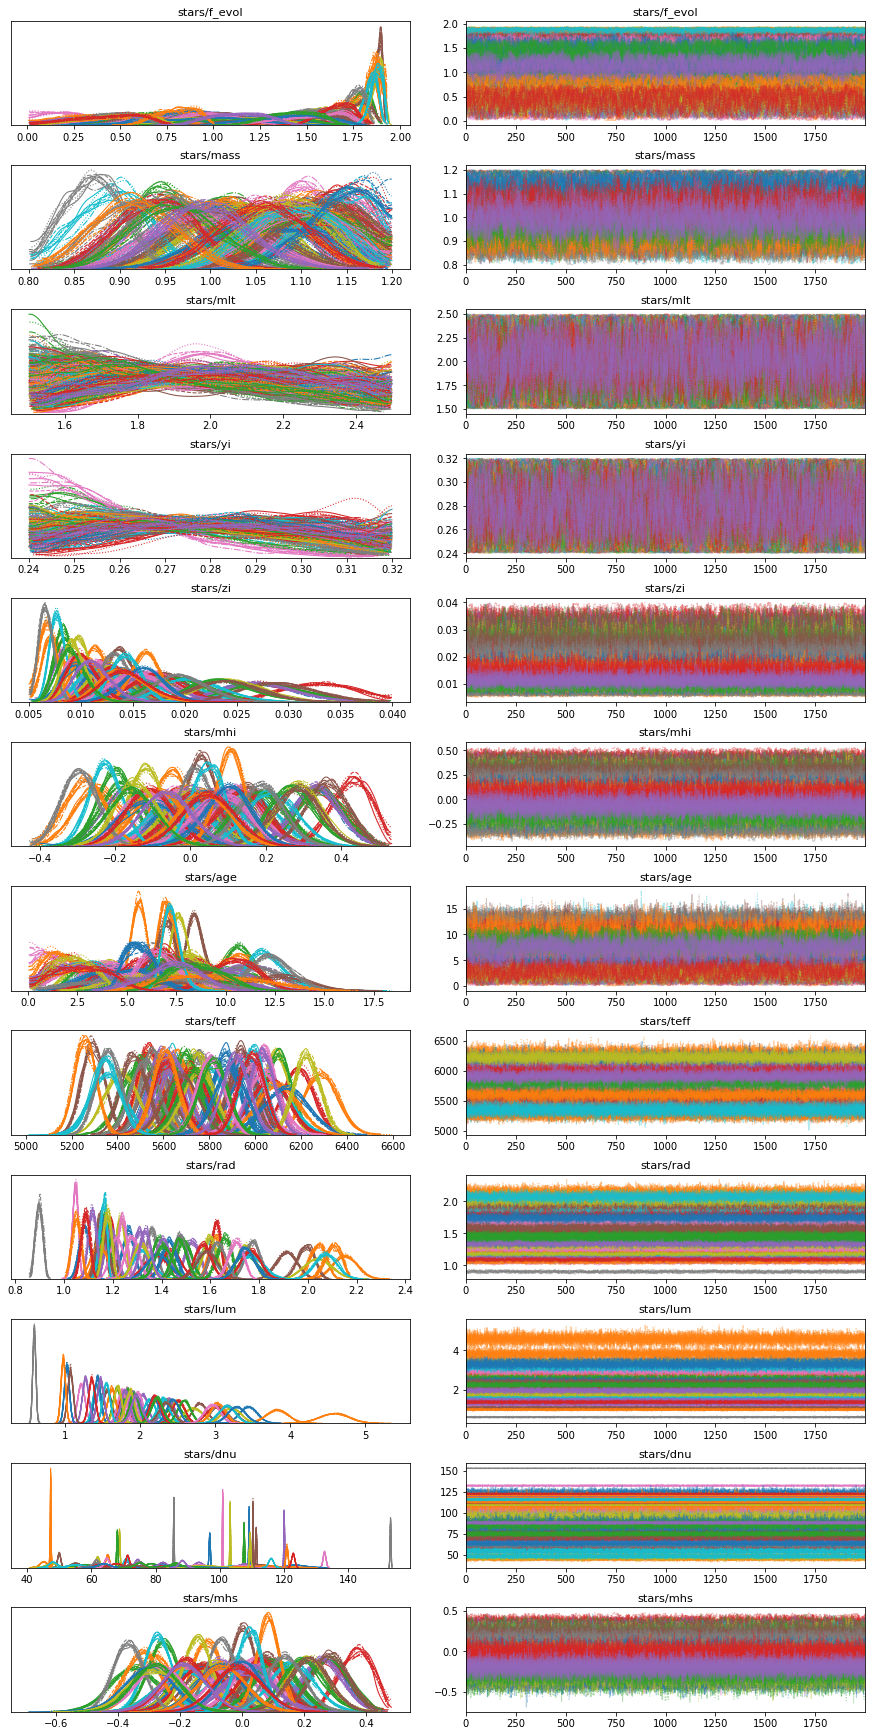

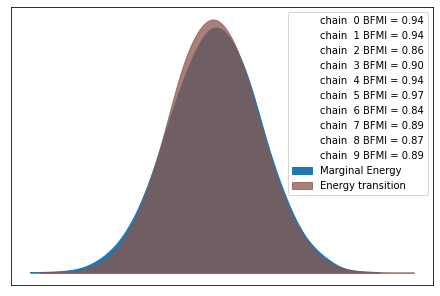

In [12]:
stars.plot_diagnostics(save=True);

In [13]:
stars.plot_corners(save=True)

In [14]:
output = stars.get_results()['stars']
output.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.763321,0.915235,1.046385,814.365176,807.303557,801.092467,2283.722583,0.665883,1.148091,...,16114.286060,16114.286060,12091.605099,-0.286714,-0.014441,0.000571,0.000404,-0.151989,1.000285,0.072446
1,KIC3942719,1.793372,1.842284,1.875486,1208.655610,1313.961699,1300.915979,4350.549601,1.745100,1.902267,...,4721.370081,4610.206042,5994.090706,-0.399115,-0.182095,0.000851,0.000609,-0.286317,1.001281,0.058497
2,KIC4457351,1.730574,1.791438,1.841019,1282.096402,1346.560937,1332.039675,3487.793276,1.684641,1.875507,...,18653.945354,16806.701632,12661.388740,-0.346223,-0.166987,0.000347,0.000258,-0.255532,1.000415,0.047389
3,KIC3223000,0.241799,0.427376,0.608999,1018.251812,1026.676044,1026.676044,1525.716817,0.117327,0.721454,...,11134.823647,11134.823647,12483.149321,-0.261360,-0.000487,0.000666,0.000471,-0.128199,1.000233,0.070297
4,KIC7429287,1.392368,1.515212,1.632316,920.639688,941.100703,926.034823,2818.445597,1.318749,1.697221,...,13411.201816,12436.152423,11806.379119,-0.416528,-0.157931,0.000604,0.000443,-0.284552,1.000286,0.069892
